# ML - ASSIGNMENT - 2

# LIVER DISEASE CLASSIFICATION


## Group - 4

|S.No|Name|Roll Number|Contribution|
|--|-------------------------------|-------------------------------|-------------------------------|
 |1. | SUBHAJA KRISHNAN K U  | 2019ab04119|100%|
 |2. | P VIPLAVI  | 2019ah04063|100%|
 |3. | SANDEEP KUMAR JAKKARAJU | 2019ah04065|100%||

In [84]:
### Importing all the required python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
## Reading the CSV file into a pandas data frame

df = pd.read_csv('liver_disease_1.csv')

## print first 10 elements/records

df.head(10)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,Yes
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,Yes
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,Yes
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,No
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,Yes


In [87]:
## printing the descriptive statistics.

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [88]:
## checking for null values in the dataframe

df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [89]:
df[df.columns[:]].median()

Age                            45.00
Total_Bilirubin                 1.00
Direct_Bilirubin                0.30
Alkaline_Phosphotase          208.00
Alamine_Aminotransferase       35.00
Aspartate_Aminotransferase     42.00
Total_Protiens                  6.60
Albumin                         3.10
Albumin_and_Globulin_Ratio      0.93
dtype: float64

In [90]:
df[df.columns[:]].mean()

Age                            44.746141
Total_Bilirubin                 3.298799
Direct_Bilirubin                1.486106
Alkaline_Phosphotase          290.576329
Alamine_Aminotransferase       80.713551
Aspartate_Aminotransferase    109.910806
Total_Protiens                  6.483190
Albumin                         3.141852
Albumin_and_Globulin_Ratio      0.947064
dtype: float64

In [91]:
df_mean_replace = df.fillna((df.mean()))
df_mean_replace.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [92]:
## checking for null values in the dataframe

df_mean_replace.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [93]:
df_mean_replace.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [94]:
df_mean_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [95]:
# printing class balance

df_mean_replace.groupby(['Dataset'])['Dataset'].count()

Dataset
No     167
Yes    416
Name: Dataset, dtype: int64

In [96]:
### LABEL encoding the categorical columns

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_mean_replace['Dataset']= label_encoder.fit_transform(df_mean_replace['Dataset'])


In [97]:
df_mean_replace['Dataset'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    1
Name: Dataset, dtype: int64

In [98]:
df_mean_replace.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

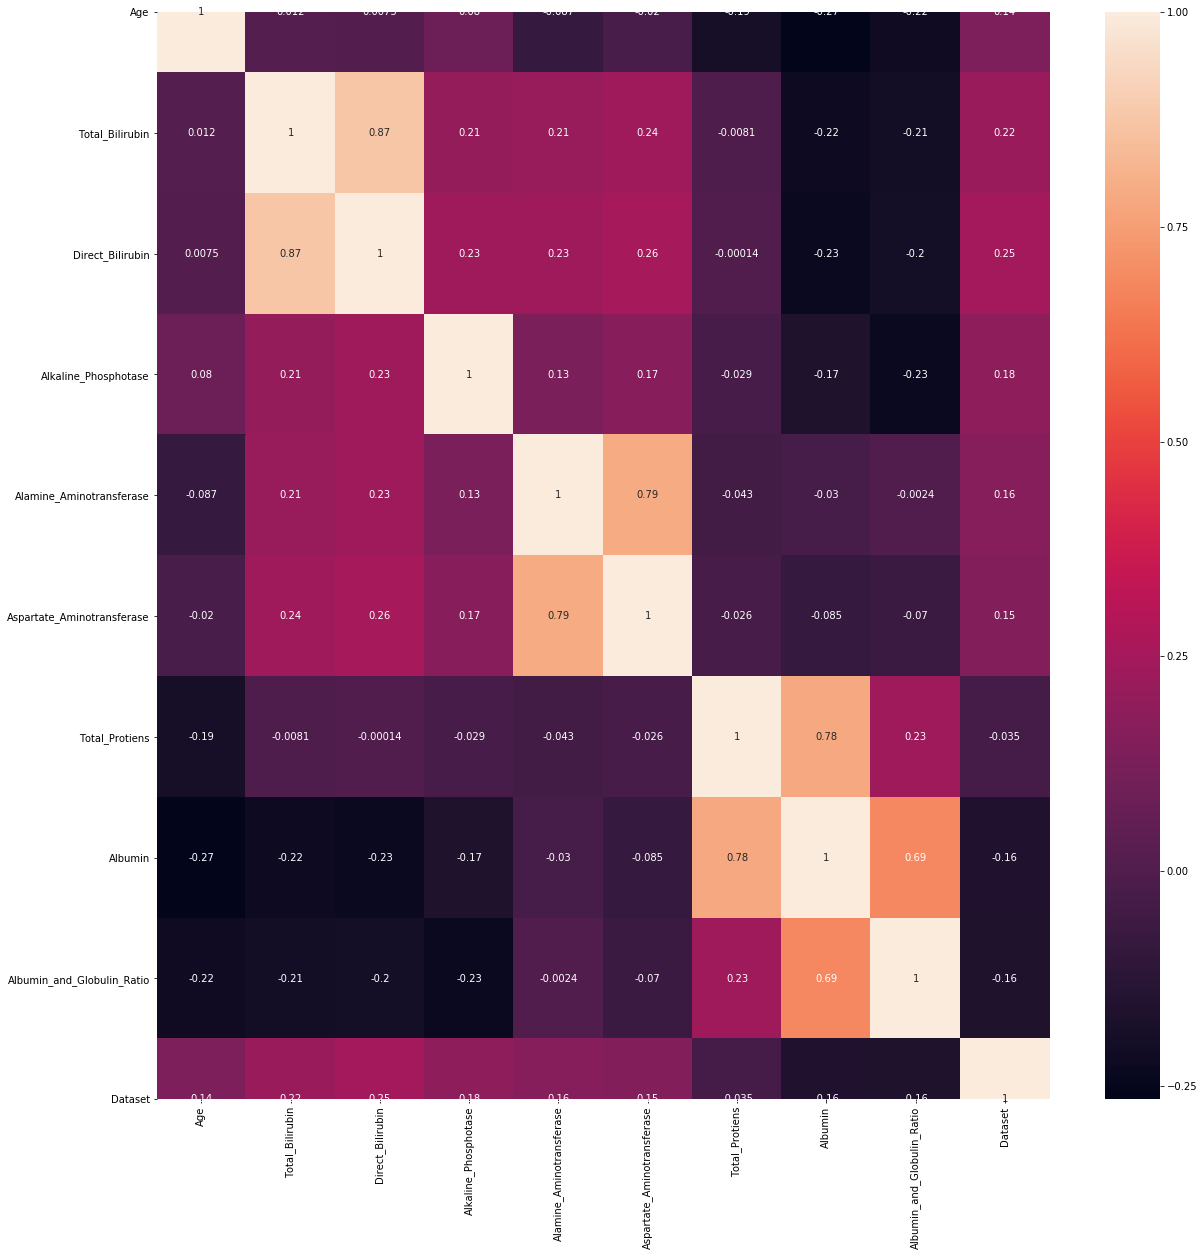

In [99]:
plt.figure(figsize=(20, 20))
corr = df_mean_replace.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [100]:
X = df_mean_replace.drop('Dataset', axis=1)
y = df_mean_replace['Dataset']

In [101]:
X

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


In [102]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

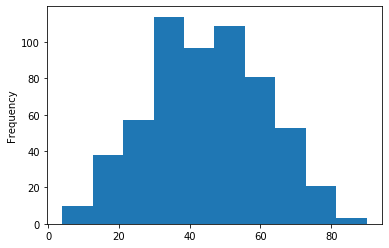

In [103]:
X['Age'].plot.hist(bins=10)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6575342465753424

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        46
           1       0.72      0.81      0.76       100

    accuracy                           0.66       146
   macro avg       0.58      0.57      0.57       146
weighted avg       0.63      0.66      0.64       146



In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6575342465753424

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        46
           1       0.72      0.81      0.76       100

    accuracy                           0.66       146
   macro avg       0.58      0.57      0.57       146
weighted avg       0.63      0.66      0.64       146



In [110]:
from xgboost import  XGBClassifier
clf5 = XGBClassifier(random_state=10)
clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
accuracy_score(y_test, y_pred)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("Random Forest", rf),("XGBOOST",clf5)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    ddf = df_mean_replace[:]
    g = sns.barplot(y=ddf.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1
